# Comparison

About **this Notebook**:  
This notebook is an example of post-treatment to **assess public policies**.  
It takes as input a folder with at least 2 output of Res-IRF run. Each represents a scenario: one considering the public policies, and one not.

**Step 1: Run Res-IRF with Multiple scenarios.**   
**Step 2: Launch this Notebook and put folder name that is a Res-IRF ouput folder.**


About **Res-IRF**:  
The Res-IRF model is a tool for simulating energy consumption for space heating in the French residential sector.  
Its main characteristic is to integrate a detailed description of the energy performance of the dwelling stock with a rich description of household behaviour.

# Code

In [1]:
name_folder = '../output/scenarios_input_2012'

### Code

In [2]:
import os
import pickle
import matplotlib.pyplot as plt
# from itertools import product
import numpy as np
import seaborn as sns
import sys

sys.path.insert(0, "..")

from ui_utils import *

In [3]:
name_file = os.path.join('input', 'colors.json')
with open(name_file) as file:
    colors = json.load(file)

In [4]:
scenarios = [f for f in os.listdir(os.path.join(name_folder)) if os.path.isdir(os.path.join(name_folder, f))]
folders = {scenario: os.path.join(name_folder, scenario) for scenario in scenarios} 

In [5]:
sns.set_palette(sns.color_palette('husl', len(scenarios)))

# Input

In [6]:
summaries_input = {scenario: pd.read_csv(os.path.join(folders[scenario], 'summary_input.csv'), index_col=[0]) for scenario in scenarios}

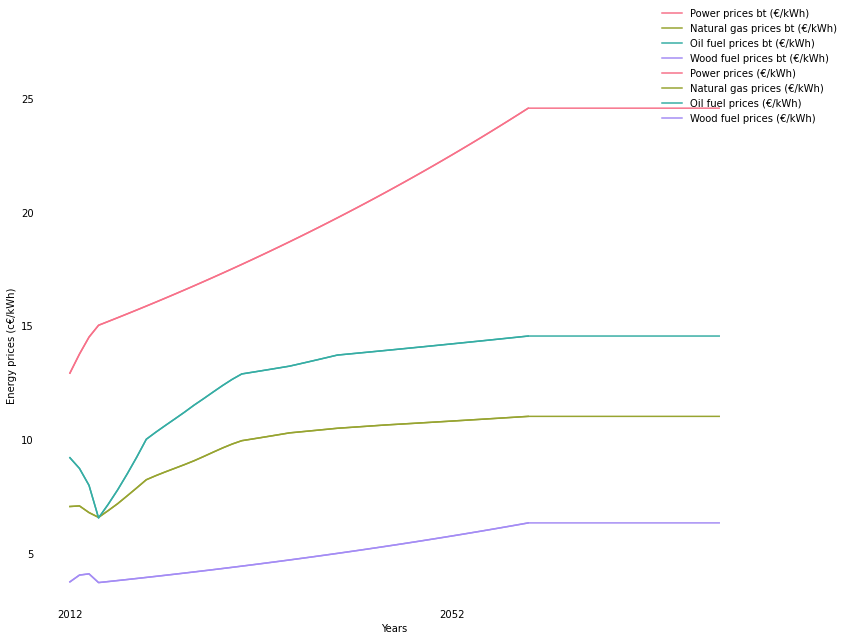

In [10]:
df = summaries_input['ZP_Reference']
prices = [i for i in df.index if 'prices' in i]
simple_pd_plot(df.loc[prices, :].T * 100, 'Years', 'Energy prices (c€/kWh)')

# Macro indicator

## Reading input

Macro indicators means global quantity or measure for all buildings and households without any segmentation (example: global stock in 2018 in the Standard scenario). These indicators can be rearrange in pd.DataFrame (index are years, and columns scenarios).  
Example bellow, for total stock:

In [11]:
summaries = {scenario: pd.read_csv(os.path.join(folders[scenario], 'summary.csv'), index_col=[0]) for scenario in scenarios}
summaries = reverse_nested_dict(summaries)
#summaries = {key: pd.DataFrame(item).dropna() for key, item in summaries.items()}
summaries = {key: pd.DataFrame(item) for key, item in summaries.items()}
display(summaries['Stock'].head())

,ZP_Reference,ZP_wo_learning_price_income_constant,ZP_wo_learning_price_constant,ZP_wo_learning
2012,2.397264e+07,2.397264e+07,2.397264e+07,2.397264e+07
2013,2.423843e+07,2.423839e+07,2.423839e+07,2.423843e+07
2014,2.451228e+07,2.451212e+07,2.451212e+07,2.451219e+07
2015,2.477752e+07,2.477730e+07,2.477730e+07,2.477735e+07
2016,2.503506e+07,2.503481e+07,2.503481e+07,2.503482e+07


In [12]:
summaries.keys()

dict_keys(['Stock', 'Consumption conventional - wo/ calibration (kWh)', 'Consumption actual - wo/ calibration (kWh)', 'Consumption conventional (kWh)', 'Consumption actual (kWh)', 'Emission (gCO2)', 'Heating intensity renovation (%)', 'Flow transition renovation', 'Aggregated renovation rate renovation (%)', 'Annual renovation expenditure (€)', 'Annual subsidies (€)', 'Energy poverty', 'Energy taxes (€)', 'Cee taxes (€)', 'Carbon tax (€)'])

## Consumption & Emission

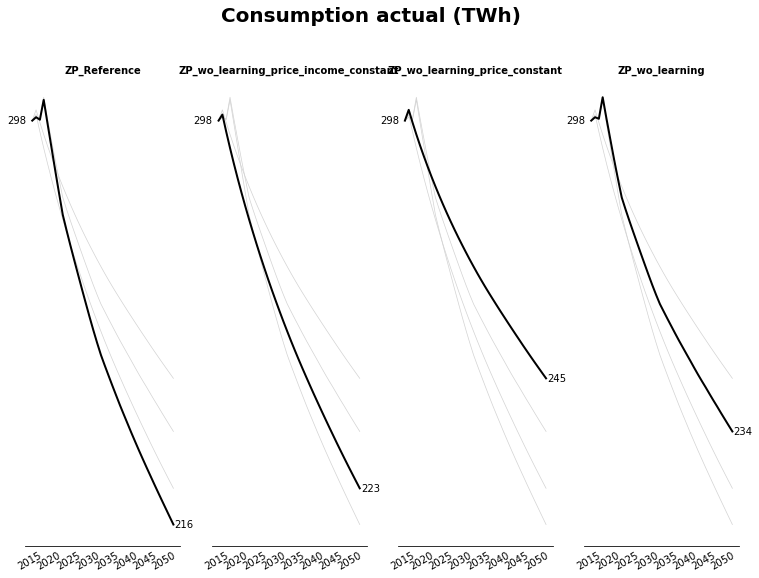

In [13]:
economic_subplots(summaries['Consumption actual (kWh)'].T, 'Consumption actual (TWh)', format_val=lambda x: '{:.0f}'.format(x / 10**9), n_columns=4)

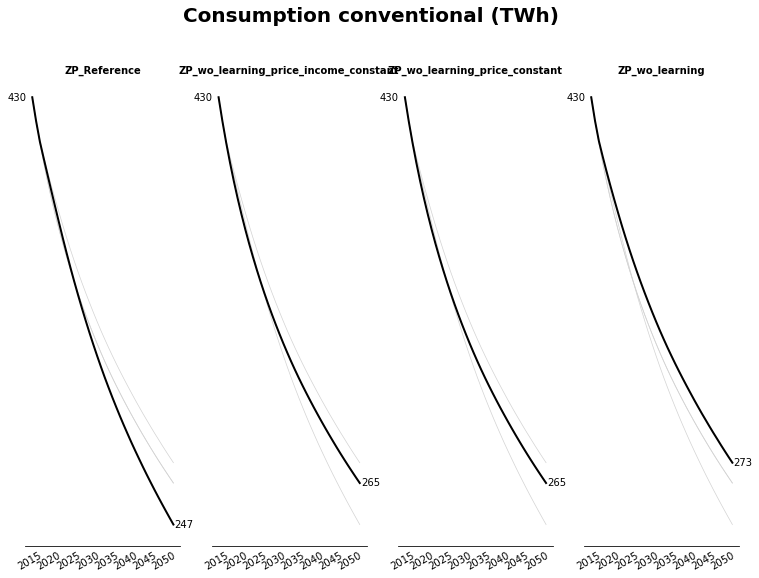

In [14]:
economic_subplots(summaries['Consumption conventional (kWh)'].T, 'Consumption conventional (TWh)', format_val=lambda x: '{:.0f}'.format(x / 10**9), n_columns=4)

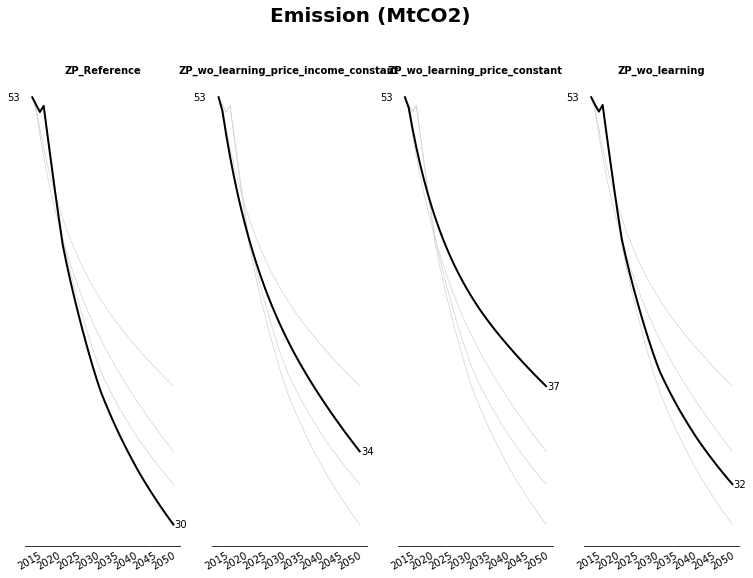

In [15]:
economic_subplots(summaries['Emission (gCO2)'].T, 'Emission (MtCO2)', format_val=lambda x: '{:.0f}'.format(x / 10**12), n_columns=4)

### Heating intensity

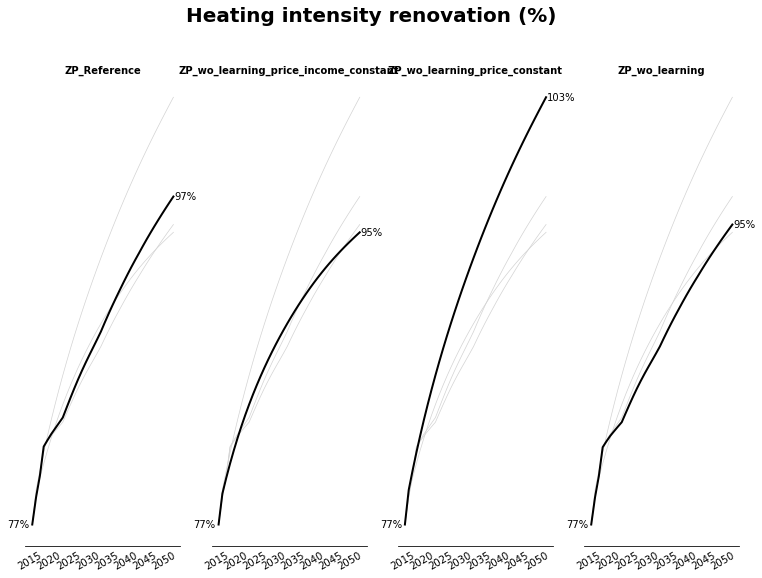

In [16]:
economic_subplots(summaries['Heating intensity renovation (%)'].T, 'Heating intensity renovation (%)', format_val=lambda x: '{:.0%}'.format(x), n_columns=4)

## Renovation

### Flow renovation

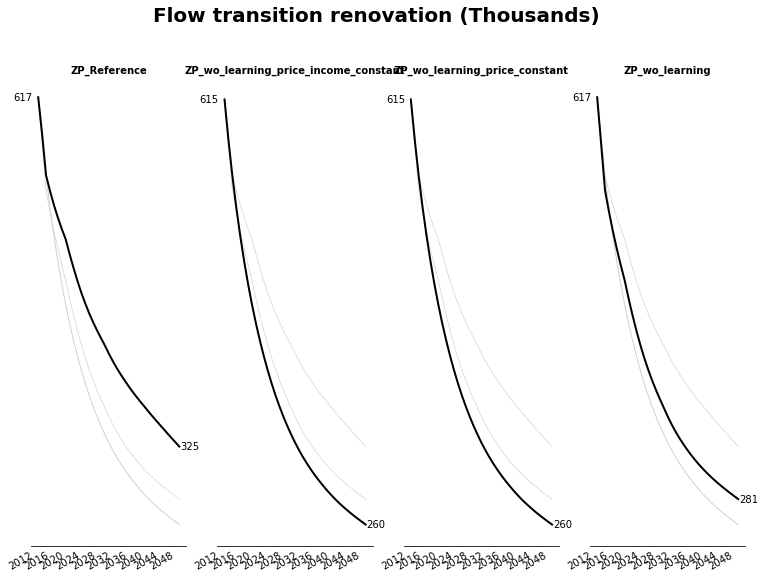

In [17]:
economic_subplots(summaries['Flow transition renovation'].T, 'Flow transition renovation (Thousands)', format_val=lambda x: '{:.0f}'.format(x / 10**3), n_columns=4)

### Stock renovation

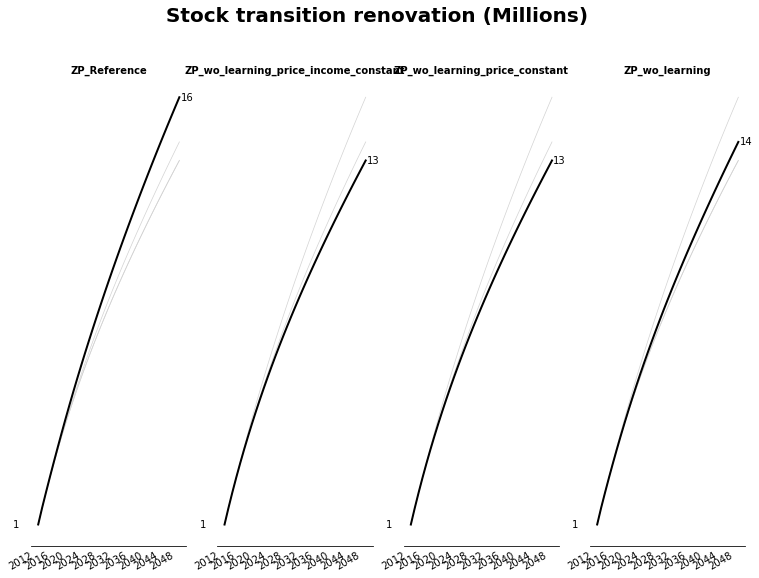

In [18]:
economic_subplots(summaries['Flow transition renovation'].T.cumsum(axis=1), 'Stock transition renovation (Millions)', format_val=lambda x: '{:.0f}'.format(x / 10**6), n_columns=4)


In [19]:
summaries['Flow transition renovation'].T

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
ZP_Reference,NaN,616964.716532,585988.377582,551846.270608,538884.156104,527064.140250,516615.177230,507081.626280,498418.914041,486117.228110,...,358948.560146,354915.089517,351013.535348,347209.661982,343461.430665,339747.347927,336027.505921,332350.174764,328754.394791,325129.597340
ZP_wo_learning_price_income_constant,NaN,614996.354168,581122.478532,551301.530826,524856.737423,501259.586662,480090.741961,461064.576985,443844.541926,428246.625690,...,285458.339182,281984.665611,278746.023468,275717.209501,272808.100154,270037.219410,267402.894454,264893.819159,262450.246545,260070.157331
ZP_wo_learning_price_constant,NaN,614996.354168,581122.478532,551301.530826,524856.737423,501259.586662,480090.741961,461064.576985,443844.541926,428246.625690,...,285458.339182,281984.665611,278746.023468,275717.209501,272808.100154,270037.219410,267402.894454,264893.819159,262450.246545,260070.157331
ZP_wo_learning,NaN,616964.716532,578405.382824,539147.569553,521441.919280,505190.983586,490480.894525,476851.788549,464209.684710,449112.801774,...,306476.847878,303074.038270,299889.083257,296891.100217,294038.334357,291319.360303,288696.364108,286160.775449,283669.114477,281248.992871


### Renovation rate

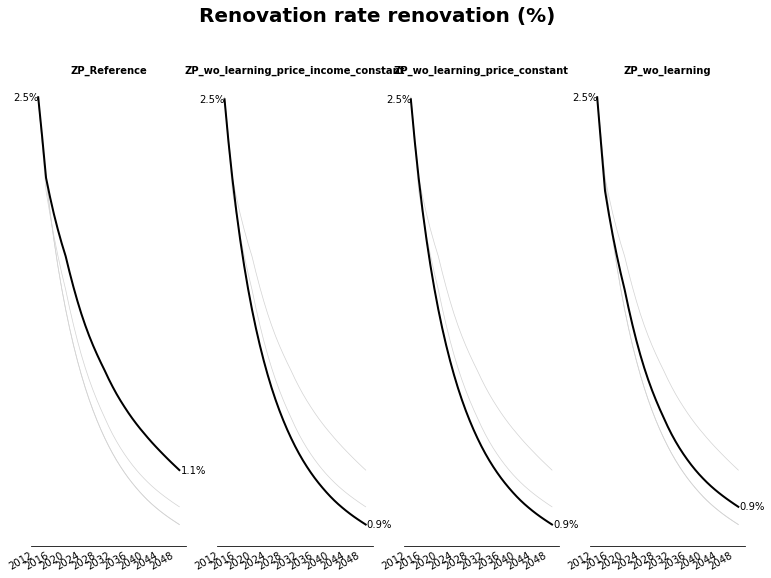

In [20]:
df = (summaries['Flow transition renovation'].T / summaries['Stock'].T)
economic_subplots(df, 'Renovation rate renovation (%)', format_val=lambda x: '{:.1%}'.format(x), n_columns=4)

## Economics

### Subsidies

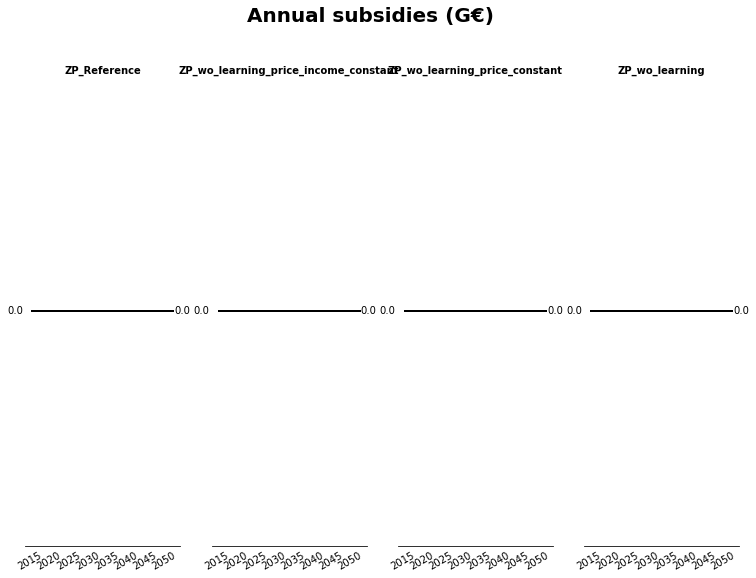

In [24]:
economic_subplots(summaries['Annual subsidies (€)'].T, 'Annual subsidies (G€)', format_val=lambda x: '{:.1f}'.format(x / 10**9), n_columns=4)

# Micro indicator

Micro indicators means segmented quantity or measure. As there are many segmentation, quantity are grouped by one or two common attributes (stock of buildings that get the same label).  
Micro indicators are then stored in dictionary, keys being the common attribute of the group and values a pandas DataFrame (same shape than Macro indicators).
Example:  
`micro_indicator = {'G': pd.DataFrame(index=years, columns=scenarios)}`

In [25]:
output_stock = {scenario: pickle.load(open(os.path.join(folders[scenario], 'output_stock.pkl'), 'rb')) for scenario in scenarios}
output_stock = reverse_nested_dict(output_stock)

In [26]:
output_stock.keys()

dict_keys(['Stock - Renovation', 'Stock (m2) - Renovation', 'Consumption conventional (kWh/m2) - Renovation', 'Consumption conventional (kWh) - Renovation', 'Consumption actual (kWh/m2) - Renovation', 'Consumption actual (kWh) - Renovation', 'Budget share (%) - Renovation', 'Heating intensity (%) - Renovation', 'Emission (gCO2/m2) - Renovation', 'Emission (gCO2) - Renovation', 'Taxes cost (€/m2) - Renovation', 'Taxes cost (€) - Renovation', 'Stock - Construction', 'Stock (m2) - Construction', 'Consumption conventional (kWh/m2) - Construction', 'Consumption conventional (kWh) - Construction', 'Consumption actual (kWh/m2) - Construction', 'Consumption actual (kWh) - Construction', 'Budget share (%) - Construction', 'Heating intensity (%) - Construction', 'Emission (gCO2/m2) - Construction', 'Emission (gCO2) - Construction', 'Taxes cost (€/m2) - Construction', 'Taxes cost (€) - Construction', 'Stock', 'Stock (m2)', 'Consumption conventional (kWh/m2)', 'Consumption conventional (kWh)', 'Co

### Stock

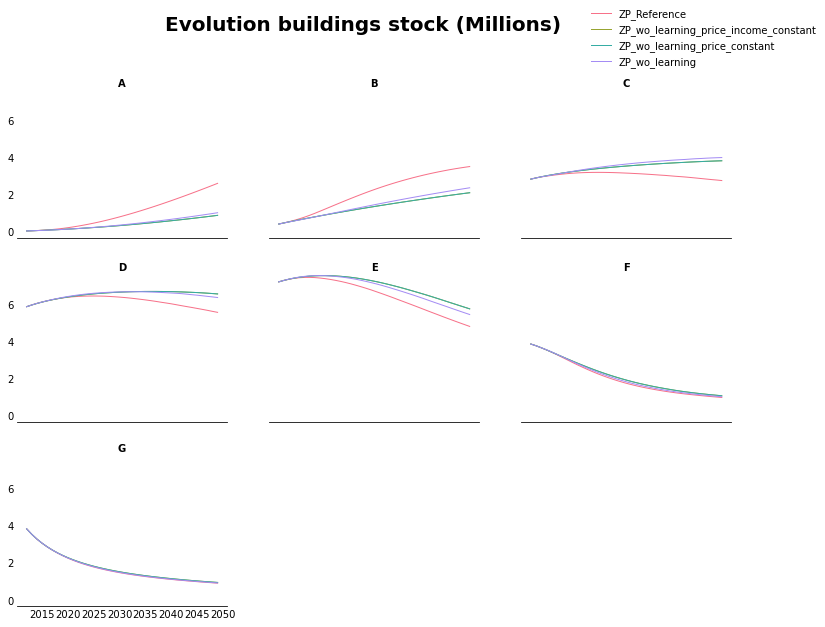

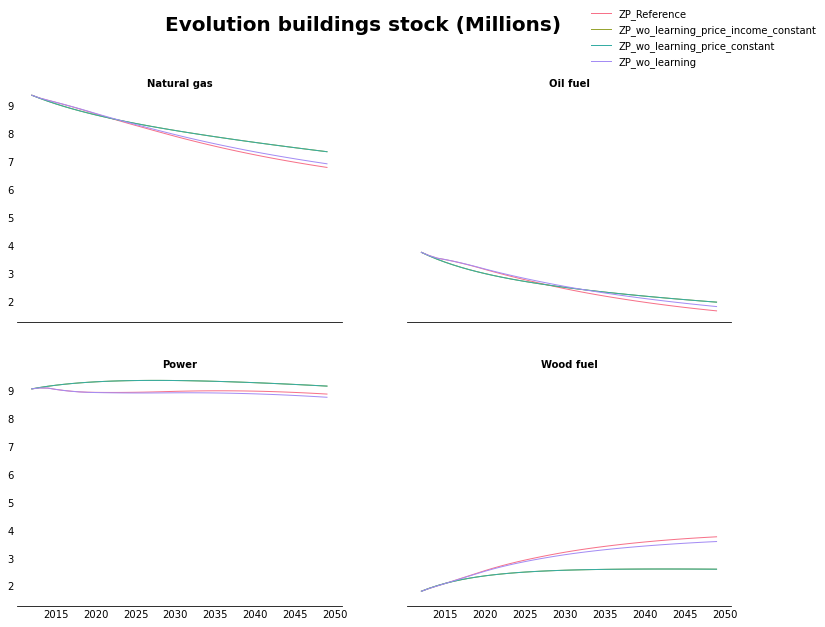

In [27]:
scenario_grouped_subplots(grouped_scenarios(output_stock['Stock - Renovation'], 'Energy performance'), suptitle='Evolution buildings stock (Millions)', format_y=lambda y, _: '{:,.0f}'.format(y/10**6), n_columns=3)
scenario_grouped_subplots(grouped_scenarios(output_stock['Stock - Renovation'], 'Heating energy'), suptitle='Evolution buildings stock (Millions)', format_y=lambda y, _: '{:,.0f}'.format(y/10**6), n_columns=2)

### Heating intensity

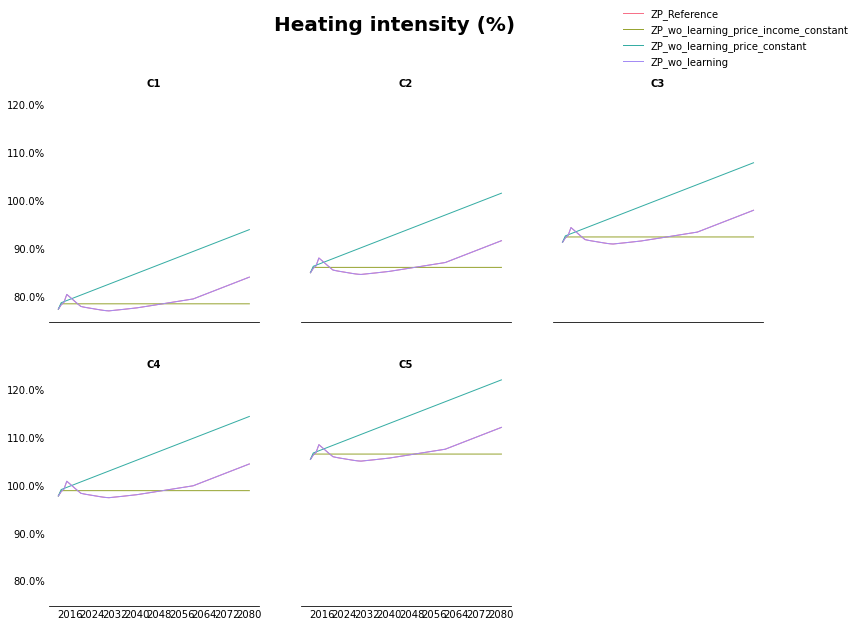

In [28]:
scenario_grouped_subplots(grouped_scenarios(output_stock['Heating intensity (%)'], 'Income class', func='mean'), suptitle='Heating intensity (%)', format_y=lambda y, _: '{:,.1%}'.format(y), n_columns=3)

### Renovation rate

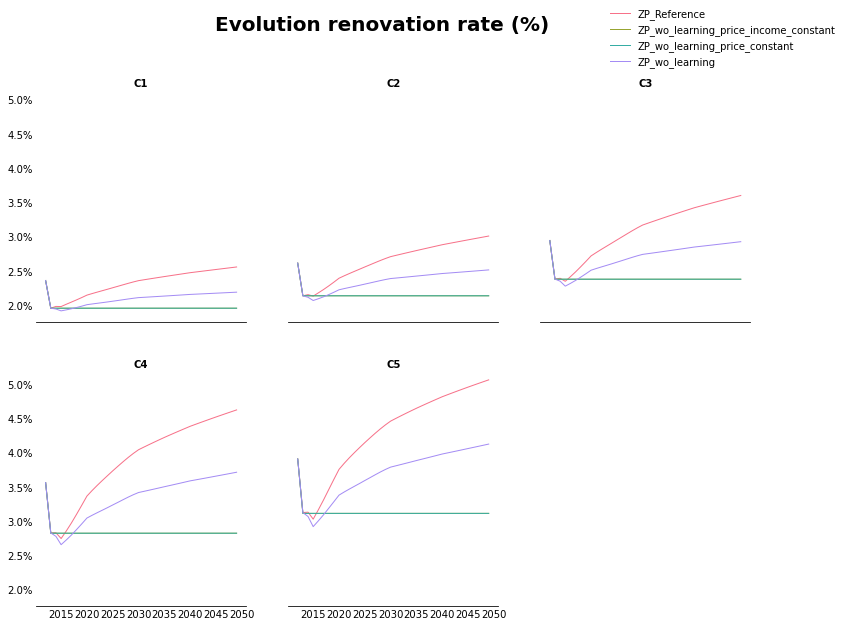

In [29]:
scenario_grouped_subplots(grouped_scenarios(output_stock['Renovation rate (%) - Renovation'], 'Income class owner', func='mean'), suptitle='Evolution renovation rate (%)', format_y=lambda y, _: '{:,.1%}'.format(y), n_columns=3)


# Transition

Graph useful to display transition are tables_plot. It's subplots oragnized as a matrix with initial state and final state as index and columns of each plot.

In [30]:
output_transition = {scenario: pickle.load(open(os.path.join(folders[scenario], 'output_transition.pkl'), 'rb')) for scenario in scenarios}
output_transition = reverse_nested_dict(output_transition)

In [31]:
output_transition.keys()

dict_keys(['Flow transition', 'Flow transition (m2)', 'Energy cost final (€/m2)', 'Energy cost initial (€/m2)', 'Energy cost saving (€/m2)', 'Capex wo/ intangible (€/m2)', 'Capex wo/ intangible energy performance (€/m2)', 'Capex intangible (€/m2)', 'Capex energy performance (€/m2)', 'Capex (€/m2)', 'Capex (€)', 'Subsidies (€/m2)', 'Subsidies (€)'])

### Flow renovation

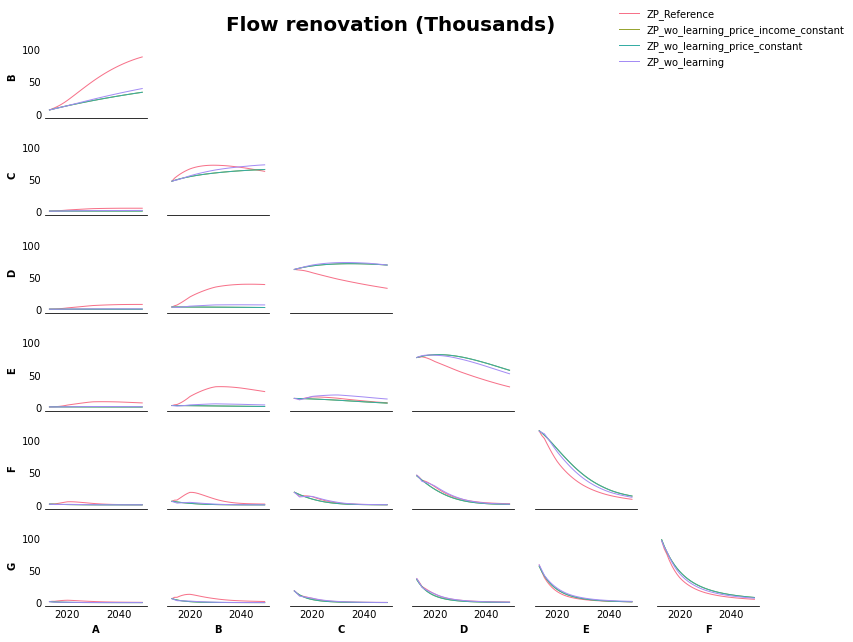

In [32]:
transition = grouped_scenarios(output_transition['Flow transition'], ['Energy performance', 'Energy performance final']) #, title='Evolution buildings stock (Thousands)', format_y=lambda y, _: '{:,.0f}'.format(y/10**3), n_columns=4)
table_plots_scenarios(transition, suptitle='Flow renovation (Thousands)', format_y=lambda y, _: '{:,.0f}'.format(y/10**3))

### Subsidies

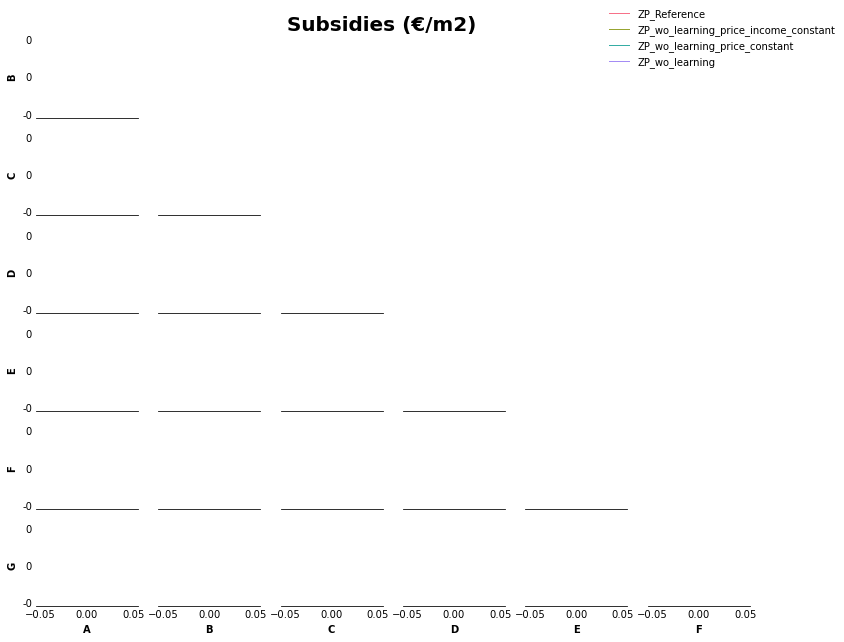

In [33]:
transition = grouped_scenarios(output_transition['Subsidies (€/m2)'], ['Energy performance', 'Energy performance final'], func='mean') #, title='Evolution buildings stock (Thousands)', format_y=lambda y, _: '{:,.0f}'.format(y/10**3), n_columns=4)
table_plots_scenarios(transition, suptitle='Subsidies (€/m2)', format_y=lambda y, _: '{:,.0f}'.format(y))

### Capex (€/m2)

TODO: Checker que le tva réduite ne soit pas double compter dans les subventions et dans la diminution du capex.

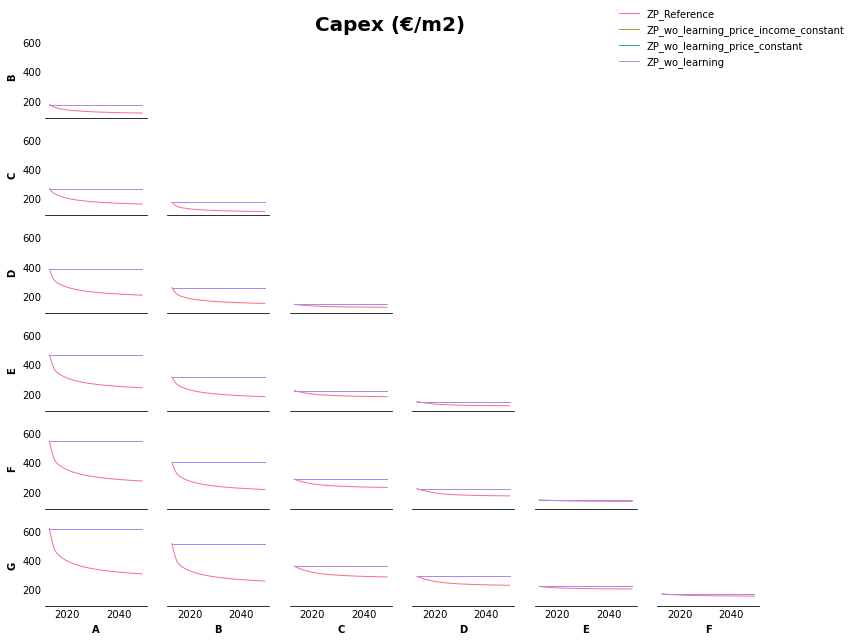

In [34]:
transition = grouped_scenarios(output_transition['Capex (€/m2)'], ['Energy performance', 'Energy performance final'], func='mean') #, title='Evolution buildings stock (Thousands)', format_y=lambda y, _: '{:,.0f}'.format(y/10**3), n_columns=4)
table_plots_scenarios(transition, suptitle='Capex (€/m2)', format_y=lambda y, _: '{:,.0f}'.format(y))

In [35]:
output_transition['Capex (€/m2)'].keys()

dict_keys(['ZP_Reference', 'ZP_wo_learning_price_income_constant', 'ZP_wo_learning_price_constant', 'ZP_wo_learning'])

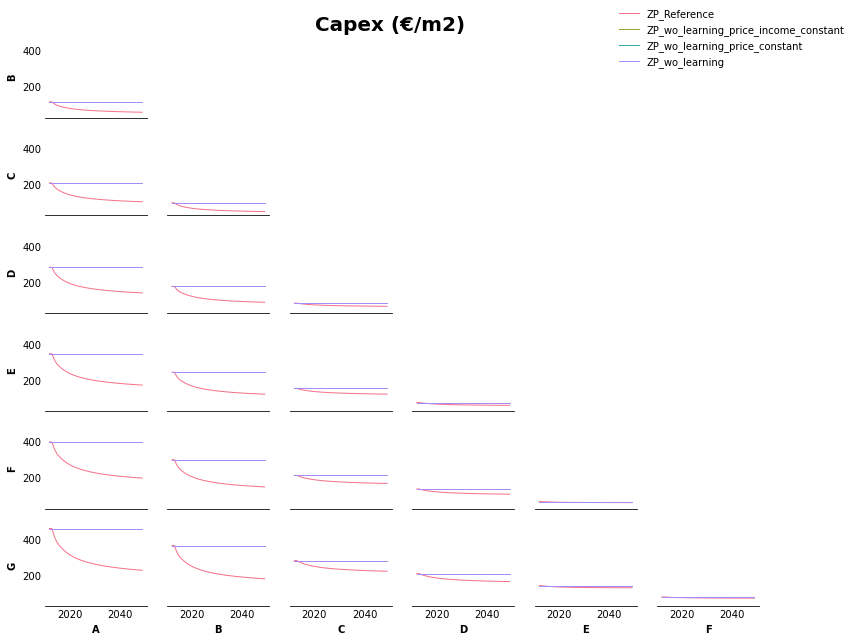

In [36]:
transition = grouped_scenarios(output_transition['Capex wo/ intangible energy performance (€/m2)'], ['Energy performance', 'Energy performance final'], func='mean') #, title='Evolution buildings stock (Thousands)', format_y=lambda y, _: '{:,.0f}'.format(y/10**3), n_columns=4)
table_plots_scenarios(transition, suptitle='Capex (€/m2)', format_y=lambda y, _: '{:,.0f}'.format(y))